In [1]:
import torch
from data import train_loader, val_loader
import matplotlib.pyplot as plt
from model import scratch
from functional import functions as F
import torch.optim as optim
import torch.nn as nn

torch.Size([64, 28, 28])
torch.Size([64])


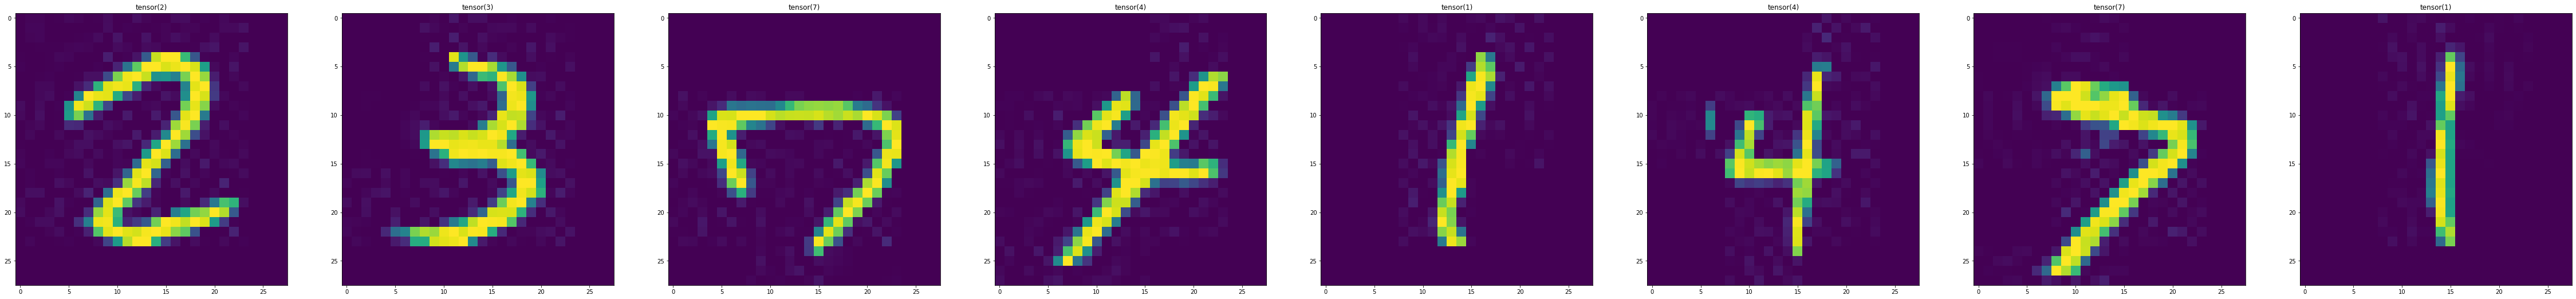

In [2]:
plt.figure(figsize=(80,10))
for x,y in train_loader:
    print(x.shape)
    print(y.shape)
    for i in range(8):
        plt.subplot(180+i+1)
        plt.imshow(x[i])
        plt.title(y[i].data)
    break

In [3]:
model_params = {

    "loss": "cross_entropy",
    "layer_config": [512, 256, 128],
    "activation": "tanh",
    "output": "softmax",
    "input_layer_size" : 28*28,
    "output_layer_size" : 10,
    "learning_rate" : 1e-2,
    "weight_decay" : 0
    
}

In [ ]:
model = scratch(model_params)
device = 'cuda'
model.to(device)

model_params["activation"] = "relu"

conf_matrix = torch.zeros(10,10, device = device)

epochs = 15
steps = 0
S, L, VL = [], [], []
train_loss = 0
interval = 20

for epoch in range(epochs):

    for X,y in train_loader : 

        X = X.to(device)
        y = y.to(device)

        output = model.forward(X)
        train_loss += F[model_params["loss"]](y, output)
        model.backward(y, output)
        model.step()

        steps += 1

        if not steps%interval :

            val_loss = 0
            val_acc = 0

            for vx,vy in val_loader : 

                vx = vx.to(device)
                vy = vy.to(device)

                output = model.forward(vx)
                val_loss += F[model_params["loss"]](vy, output)
                pred = torch.argmax(output, dim = 1)

                val_acc += (pred == vy).sum()
                conf_matrix[vy][pred]+=1

            VL.append((val_loss/len(val_loader)).cpu().data)
            L.append((train_loss/interval).cpu().data)

            print(VL[-1], L[-1], val_acc.cpu().data/len(val_loader))

            train_loss = 0

plt.figure(figsize = (30,10))

plt.subplot(131)
plt.plot(S, L)
plt.title("Steps vs Training Loss")
plt.xlabel("Steps")
plt.ylabel("Training Loss")

plt.subplot(132)
plt.plot(S, VL)
plt.title("Steps vs Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Validation Loss")

plt.subplot(133)
plt.imshow(conf_matrix.cpu().data)
plt.title("Confusion Matrix")
plt.xlabel("Labels")
plt.ylabel("Predictions")

plt.show()

In [ ]:
model = scratch(model_params)
device = 'cuda'
model.to(device)

model_params["activation"] = "tanh"

conf_matrix = torch.zeros(10,10, device = device)

epochs = 15
steps = 0
S, L, VL = [], [], []
train_loss = 0
interval = 20

for epoch in range(epochs):

    for X,y in train_loader : 

        X = X.to(device)
        y = y.to(device)

        output = model.forward(X)
        train_loss += F[model_params["loss"]](y, output)
        model.backward(y, output)
        model.step()

        steps += 1

        if not steps%interval :

            val_loss = 0
            val_acc = 0

            for vx,vy in val_loader : 

                vx = vx.to(device)
                vy = vy.to(device)

                output = model.forward(vx)
                val_loss += F[model_params["loss"]](vy, output)
                pred = torch.argmax(output, dim = 1)

                val_acc += (pred == vy).sum()
                conf_matrix[vy][pred]+=1

            VL.append((val_loss/len(val_loader)).cpu().data)
            L.append((train_loss/interval).cpu().data)

            print(VL[-1], L[-1], val_acc.cpu().data/len(val_loader))

            train_loss = 0

plt.figure(figsize = (30,10))

plt.subplot(131)
plt.plot(S, L)
plt.title("Steps vs Training Loss")
plt.xlabel("Steps")
plt.ylabel("Training Loss")

plt.subplot(132)
plt.plot(S, VL)
plt.title("Steps vs Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Validation Loss")

plt.subplot(133)
plt.imshow(conf_matrix.cpu().data)
plt.title("Confusion Matrix")
plt.xlabel("Labels")
plt.ylabel("Predictions")

plt.show()

In [ ]:
model = scratch(model_params)
device = 'cuda'
model.to(device)

model_params["activation"] = "sigmoid"

conf_matrix = torch.zeros(10,10, device = device)

epochs = 15
steps = 0
S, L, VL = [], [], []
train_loss = 0
interval = 20

for epoch in range(epochs):

    for X,y in train_loader : 

        X = X.to(device)
        y = y.to(device)

        output = model.forward(X)
        train_loss += F[model_params["loss"]](y, output)
        model.backward(y, output)
        model.step()

        steps += 1

        if not steps%interval :

            val_loss = 0
            val_acc = 0

            for vx,vy in val_loader : 

                vx = vx.to(device)
                vy = vy.to(device)

                output = model.forward(vx)
                val_loss += F[model_params["loss"]](vy, output)
                pred = torch.argmax(output, dim = 1)

                val_acc += (pred == vy).sum()
                conf_matrix[vy][pred]+=1

            VL.append((val_loss/len(val_loader)).cpu().data)
            L.append((train_loss/interval).cpu().data)

            print(VL[-1], L[-1], val_acc.cpu().data/len(val_loader))

            train_loss = 0

plt.figure(figsize = (30,10))

plt.subplot(131)
plt.plot(S, L)
plt.title("Steps vs Training Loss")
plt.xlabel("Steps")
plt.ylabel("Training Loss")

plt.subplot(132)
plt.plot(S, VL)
plt.title("Steps vs Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Validation Loss")

plt.subplot(133)
plt.imshow(conf_matrix.cpu().data)
plt.title("Confusion Matrix")
plt.xlabel("Labels")
plt.ylabel("Predictions")

plt.show()

In [ ]:
from model import pytorch

LEARNING_RATE =  model_params["learning_rate"]
WEIGHT_DECAY = model_params["weight_decay"]

model = pytorch(10)
device = 'cuda'
model.to(device)

conf_matrix = torch.zeros(10,10, device = device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

epochs = 15
steps = 0
S, L, VL = [], [], []
train_loss = 0
interval = 200

for epoch in range(epochs):

    for X,y in train_loader : 

        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        output = model(X)
        loss = criterion(output, y)
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        steps += 1

        if not steps%interval :

            model.eval()

            val_loss = 0
            val_acc = 0

            for vx,vy in val_loader : 

                vx = vx.to(device)
                vy = vy.to(device)

                output = model(vx)
                loss = criterion(output, vy)
                pred = torch.argmax(output, dim = 1)

                conf_matrix[vy, pred] += 1

                val_acc += (pred == vy).sum()
                val_loss += loss.item()

            VL.append((val_loss/len(val_loader)))
            L.append((train_loss/interval))
            S.append(steps)

            train_loss = 0
            model.train()

plt.figure(figsize = (30,10))

plt.subplot(131)
plt.plot(S, L)
plt.title("Steps vs Training Loss")
plt.xlabel("Steps")
plt.ylabel("Training Loss")

plt.subplot(132)
plt.plot(S, VL)
plt.title("Steps vs Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Validation Loss")

plt.subplot(133)
plt.imshow(conf_matrix.cpu().data)
plt.title("Confusion Matrix")
plt.xlabel("Labels")
plt.ylabel("Predictions")

plt.show()
